<a href="https://colab.research.google.com/github/schmuecker/machine-learning-course/blob/main/01%20explorative-analysis-pca/01.3%20pca/%C3%9Cbung_1.3_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import der Bibliotheken

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

np.__version__, pd.__version__

('1.19.5', '1.1.5')

## Download der Housing Daten

In [2]:
fileUrl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'

cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B',
        'LSTAT','TGT']

data = pd.read_csv(fileUrl, sep=' ', skipinitialspace=True, header=None, names=cols, 
                     index_col=False)

dateDownloaded = !date #Calling Linux
dateDownloaded

['Tue Oct 26 16:14:19 UTC 2021']

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
#a)
def pca(df: pd.DataFrame):

  #1. Zentrierung
  for col in df.columns:
    df[col] = df[col] - df[col].mean()

  #2. Normierung, z-Transformation damit Varianz immer 1 ist
  df = df.apply(stats.zscore)

  #3. DF zu n * d Matrix X umwandeln
  X = df.to_numpy()

  #4.-7. Eigenwertproblem
  U, D, V = np.linalg.svd(X, full_matrices=False)

  return U, D , V

* U ist unitäte n * n Matrix (n ist Anzahl der Samples in X) und ergibt multipliziert mit D die Projektionen der Daten auf die Basisvektoren
* D enthält die Singular Values der PCs
* V ist unitäre m * m Matrix (m ist die Anzahl der Features und damit auch der PCs) und enthält die Basisvektoren (also die PCs)

In [5]:
#b)
data_no_tgt = data.drop("TGT", axis=1)
U, D, V = pca(data_no_tgt)
n = U.shape[0]

Die Werte von D müssen quadirert werden um die Eigenwerte zu erhalten, da der Singularwert als Wurzel des Eigenwerts definiert ist. Durch n-1 wird geteilt und die Varianz zu erhalten.

In [9]:
d = pd.DataFrame(D, columns=["SingularValue"])
d["EigenValue"] = d["SingularValue"] ** 2
d["Varianz"] = d["SingularValue"] / (n-1)
d["AnteilVarianz%"] = d["Varianz"] / (d["Varianz"].sum()) * 100
d["Kumuliert%"] = d["AnteilVarianz%"].cumsum()
d["Fehler"] = 100 - d["Kumuliert%"]
d

,SingularValue,EigenValue,Varianz,AnteilVarianz%,Kumuliert%,Fehler
0,55.679309,3100.185506,0.110256,22.731479,22.731479,77.268521
1,26.930229,725.237212,0.053327,10.994460,33.725939,66.274061
2,25.075168,628.764037,0.049654,10.237118,43.963057,56.036943
3,20.831059,433.933005,0.041250,8.504430,52.467486,47.532514
4,20.552782,422.416864,0.040699,8.390821,60.858308,39.141692
5,18.238641,332.648031,0.036116,7.446057,68.304364,31.695636
6,16.458742,270.890180,0.032592,6.719400,75.023764,24.976236
7,14.157162,200.425241,0.028034,5.779763,80.803528,19.196472
8,11.837792,140.133325,0.023441,4.832864,85.636392,14.363608
9,10.556531,111.440339,0.020904,4.309780,89.946171,10.053829


Wieviele Dimensionen können Sie weglassen, wenn Sie 10%, 5% und 1% Fehler bei der Dimensionsreduktion zulassen?
* 10%: 2-3 Dimensionen weglassen
* 5%: 1-2 Dimension weglassen
* 1% keine Dimension weglassen

In [10]:
#c)
#Sind mit den "transformierten Variablen" diese hier gemeint?
for col in data_no_tgt.columns:
  data_no_tgt[col] = data_no_tgt[col] - data_no_tgt[col].mean()
data_no_tgt = data_no_tgt.apply(stats.zscore)

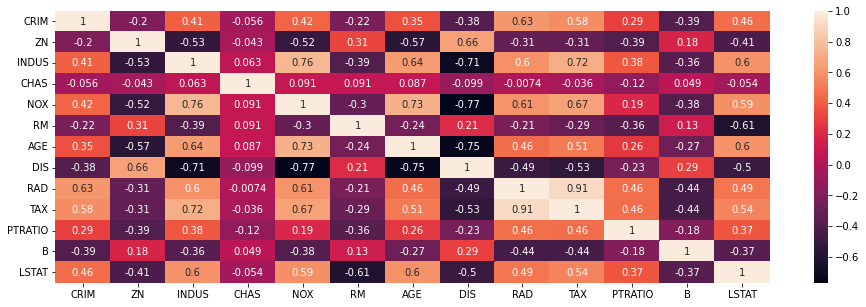

In [11]:
corr = data_no_tgt.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

TODO: Interpretation

Zwischen den Variablen bestehen vor der PCA teilweise positive sowie negative Korrelationen.

Starke Korrelationen:
- TAX + RAD
- DIS + INDUS
- DIS + NOX
- DIS + AGE


In [12]:
U.shape, D.shape

((506, 13), (13,))

In [13]:
D

array([55.6793095 , 26.93022859, 25.07516773, 20.83105866, 20.55278239,
       18.23864114, 16.45874174, 14.15716218, 11.83779223, 10.55653065,
        9.70171478,  9.25566343,  5.66883461])

In [25]:
D_diag = np.diag(D)

In [27]:
#d)
X_projected = np.matmul(U, D_diag)
X_projected.shape

(506, 13)

In [16]:
X_projected_3 = X_projected[:,[0,1,2]]
X_projected_3.shape

(506, 3)

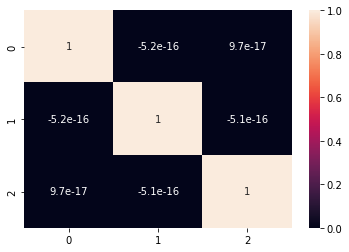

In [17]:
X_projected_3_df = pd.DataFrame(X_projected_3)
corr = X_projected_3_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

Keine Korrelationen zwischen den Projektionen

In [18]:
#TODO: bessere Möglichkeit?
pc1_cor = data.corrwith(X_projected_3_df[0])
pc2_cor = data.corrwith(X_projected_3_df[1])
pc3_cor = data.corrwith(X_projected_3_df[2])

pc_cor = pd.DataFrame(pc1_cor)
pc_cor[1] = pc2_cor
pc_cor[2] = pc3_cor

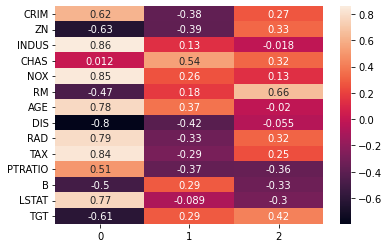

In [19]:
sns.heatmap(pc_cor, xticklabels=pc_cor.columns, yticklabels=pc_cor.index, annot=True)

TODO Interpretation

Die 3 PCs korrelieren teilweise stark positiv und negativ mit den ursprünglichen Variablen

In [20]:
#e)
X_projected_2 = X_projected[:,[0,1]]
X_projected_2_df = pd.DataFrame(X_projected_2) 

In [21]:
high_tgt = data["TGT"] > data["TGT"].mean()
X_projected_2_df["TGT"] = high_tgt

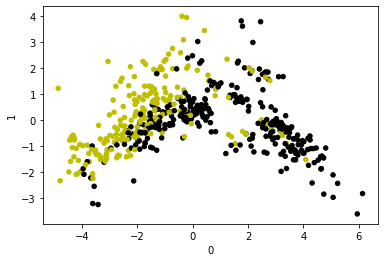

In [22]:
colors = np.where(X_projected_2_df["TGT"],'y','k')
X_projected_2_df.plot.scatter(x=0,y=1,c=colors)
plt.show()

PC1 und PC2 eignen sich bedingt zur Vorhersage der Hauspreise